Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 3.9967 - accuracy: 0.0227 - val_loss: 2.4907 - val_accuracy: 0.4545
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 4.0356 - accuracy: 0.2500 - val_loss: 2.8145 - val_accuracy: 0.2727
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 3.0281 - accuracy: 0.2273 - val_loss: 2.1327 - val_accuracy: 0.2727
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 2.3156 - accuracy: 0.3864 - val_loss: 2.9979 - val_accuracy: 0.2727
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 1.8843 - accuracy: 0.3409 - val_loss: 1.6455 - val_accuracy: 0.4545
Epoch 6/50
1/1 [==============================] - 7s 7s/step - loss: 1.8086 - accuracy: 0.4545 - val_loss: 1.3805 - val_accuracy: 0.4545
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 1.4405 - accuracy: 0.4545 - val_loss: 1.3440 - val_accuracy: 0.4545
Epoch 8/50
1/1 [=========================

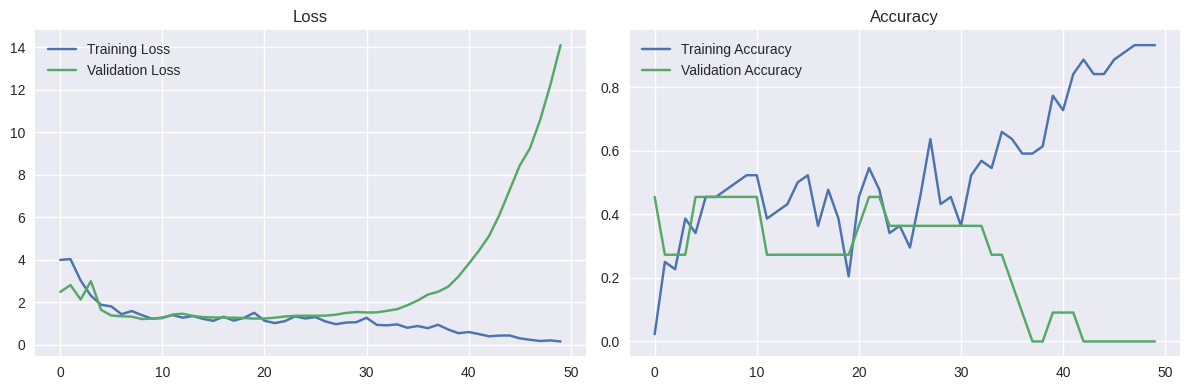

In [13]:
#import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load and preprocess data
data = pd.read_csv('data.csv')
labels = pd.read_csv('label.csv')

X = data[['ACC X', 'Light']].values
y = labels.values
X = X.reshape(-1, 2500, 2)
X = (X - np.mean(X)) / np.std(X)

y_one_hot = tf.keras.utils.to_categorical(y, num_classes=55)

# Build the CNN model
model = Sequential([
    Conv1D(64, kernel_size=5, activation='relu', input_shape=(2500, 2)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(256, kernel_size=3, activation='relu'),
    Conv1D(256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(512, kernel_size=3, activation='relu'),
    Conv1D(512, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(55, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Split the data into training and validation sets
validation_split = 0.2
split_index = int(len(X) * (1 - validation_split))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y_one_hot[:split_index], y_one_hot[split_index:]

# Train the model
batch_size = 256
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

# Save model summary to 'output.txt'
with open('output.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()
